<a href="https://colab.research.google.com/github/nupursjsu/Deep-Learning/blob/master/assignment_2/Keras_sparseCategoricalEntropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [30]:
import requests
import cv2
import os
 
from imutils import paths
import pandas as pd
from fastai.imports import *
data = pd.read_csv('https://raw.githubusercontent.com/nupursjsu/Deep-Learning/master/assignment_2/batman.csv', sep='delimiter', header=None)
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('batman'):
    os.mkdir('batman')
image_path = 'batman'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('Could not download {}. Downloading next file')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRDFPWNOOhrqomzgRHo4AIhO1U0T-x2gOte-en5do3ITf4vVnPX', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ8isvEwbG6ZIKKp5tn08EWebtMf3CGnK9UVk3fZHpjmSYis2z8', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTD0t-BqLhJNz1VAGCaU_VwUqQPDG4e5_G-1eSf8bNL_H6-qpzp', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT4dLjiF9Sjhxu6U4EAH6dEv24WWgxIBczhXc_tZ2bX3cnWmJZW', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTeCHCOYxWv1BTYo6saRCHJS_Z1n6MR8CrPL4zgf8r31ZKYj_Fn', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcREXtdeGqtYsFLH3jQPFycatqwnTg48Sg9avSXhoKWUMek2e8sC', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRlsOblr_Jhpdv7BvJ-aTxXm7OKSc9x86VdKyVNPY9K3oZF24Aj', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS_IhUhhdF50bBQKLYxKSLN7oCX5wCpTVTYJ9uodXHOLHJIqf0y', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRR2I5N-u28tSbsHEdKV3bX4rVXQILyN9d3EpIsFEqh5Dk_KqzS', 'htt

In [31]:
data = pd.read_csv('https://raw.githubusercontent.com/nupursjsu/Deep-Learning/master/assignment_2/cars.csv', sep='delimiter', header=None)
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('cars'):
    os.mkdir('cars')
image_path = 'cars'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('Could not download {}. Downloading next file')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTueWsuqnqPUJCn6MJgHbXq-cPPOuMe7k7pLdJbp6i7j0cCUzHd&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTITTqa52ejbo05fKkcDzXTgTukodTBDOFhOi8Ky-sfq-WH3Vt5&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQEit9wD7-jiIW4FmbSvpJPVArp6Oz-UiWRVG50i3R3NKXCRJ3F&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQjfEPm_lv-DIrGOjqAftE4v91FogwUI_DoZM-n6lavBbdpjFMa&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRCvlsYGJXI9SJaxGyexSpdmaaHr22zGYmPmBFwARI_U312kQHC&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTQ7yTCsPlvWUeuP6nnMp2DJxNfSRWnUJFzWWHeXloYGlvWJPqm&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQYxPn-Qbd-GniD4ExKVQIZn1De2G91wi0TTa0EV9llyngBGVVJ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQpaOexXQpRpu85_Xz8xHnJOL6nycw-pZZ1bezgK1Fp8VptDdBk&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

In [32]:
data = pd.read_csv('https://raw.githubusercontent.com/nupursjsu/Deep-Learning/master/assignment_2/donald_duck.csv', sep='delimiter', header=None)
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('donald_duck'):
    os.mkdir('donald_duck')
image_path = 'donald_duck'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('Could not download {}. Downloading next file')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRGuHP1J44sse_MPpwYl3E5hBhA9mp3za_BGq17I18Z3_Bz9aIs', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSEU9dUNnvVib-L0YB5Er5hZO9i1fBwsRTWVHnR5F-liOir7gLU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTiYXsnm-rDnNkJ2Hk79ueud1rFOB58tCJSxPghfbx6fkZk1M6D', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSpPKH3kjbdF1YtdQDiJ2OUmhvyCZ-uwYhvEANogdcvuaehInYn', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSEg8ax8DjUmoqftQ_THsTx9r8E3sQ3HOlIhRKvza3GktbevKwT', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSpGLaLOHNVjvNmeIVKZE3qwnxxmsKkbZtMINFlVPI22qkZsFZD', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT5rhhwr7Hwh-M1YiA98cRhsvoP9cV_E0jfUojsQIPlkomDlUm2', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSKaP6uUAFHgcBixobiXd1QOqSnY5XZMJwuaq65e9G85zO4m5Xw', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQyIhnQycyXJ8XmK3fG9OGkMXxHHjsqV-8CAP3U4XbxGoUGLCi-', 'htt

In [33]:
data = pd.read_csv('https://raw.githubusercontent.com/nupursjsu/Deep-Learning/master/assignment_2/mickey_mouse.csv', sep='delimiter', header=None)
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('mickey_mouse'):
    os.mkdir('mickey_mouse')
image_path = 'mickey_mouse'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('Could not download {}. Downloading next file')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTqD952rXxZThV_geDw1uDMc6TH0pmVPhQdtww2RTc4L6hXXjL3', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRx7cNvQbod7SDpx-ax52VNKl1BmGyo4fQ8YM9Fsvpzkh4puH3Y', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQT7vfrTieWRDSfVzj3sZEyspNsXvk-RUAvMUJGcQoFsnvWLiRE', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR-X5y1lRHxOFEedGk3IPsrlbkIlK_M3OAvj3cntn1-2DW9-zWi', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSYywSgz7Fi52x42M8O8bE8QeX9psAlzY2VjDgDNvtR5wCYYC52', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQPXGGVerD40ZpLZF-F4wV7wUNp-BwQcxDKzy4trirmrUWvGU9f', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRWYJG0ayz7tXTBeEb_RoOy0AnrtQ_WFNBYHLz8kBzLYAPqpUHB', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRcriqwF61VOsLKiLDvIM6ZZQ0q8pEDqZ_HvaKmI0Uce0HKOPmy', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTTgRdBh7V0ZVDCeV4WKa8aTSCTFcsUF6xrNzkaIjoIM05Q3vyy', 'htt

In [34]:
data = pd.read_csv('https://raw.githubusercontent.com/nupursjsu/Deep-Learning/master/assignment_2/nature.csv', sep='delimiter', header=None)
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('nature'):
    os.mkdir('nature')
image_path = 'nature'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('Could not download {}. Downloading next file')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ_j4WGlVTzQPwZI8gK-pDhQwSap0Hr6TVmjprwQk7oGZ9xj35_&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ_NE3MBZZ1dUqSEMjxODx0M3Nng4Gc2pQjVEjzTr2iwJp5rmD1&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ_v1uHs4ybQhn1z2aFnTFrm12gCn-x1RBCgBw2ptppqayygD4e&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ_WeB0ky4MDUDDug8BcHUEMgFy3Owii-4_wCuN8GGiF8dnqGtw&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-80QtSgSKqEqpz0ClzJB28oFDMt1DRjxZ8hFnaSxOhR2OlI3_&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-hr765xaUJ7cJp8Qpp6bMMFILBdbS23xS6CIkjUR0v_UmklCc&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-t36-L0DySLxRtDXBzvmB5zOSgmeeeAnINk8YPGYfUksTFpPs&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-xsq_TiIcDBSImE9gRHuVKed1iq-q_VKTcyB3lloReK5aqHj3&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

In [35]:
data = pd.read_csv('https://raw.githubusercontent.com/nupursjsu/Deep-Learning/master/assignment_2/sheeps.csv', sep='delimiter', header=None)
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('sheeps'):
    os.mkdir('sheeps')
image_path = 'sheeps'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('Could not download {}. Downloading next file')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ9GGJd5aLBrsh-kBnXCavfa7qyoDUWJwi4_P8LdhwqaGYEzJIN&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRhUoi9eSGylf3-1Zaxic1rlKgfz_muUvUSdXRwbe-JwJEGBvut&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSITdTI6ZxdQR3MCOI08PEG68C6NprprqyBrXDW8_8nEMCq9lDT&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTe8suqxnoO4iD1zGsci2Sanjb5nylABzgY2ax7elsH1CO21nXv&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRiuzkCRRA183t97rHVXI-gn7ay-CDBARfO0L4eEEqBb1TVN6I_&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT5hd_R8CsyOfyl1xxawZhecyGwqbq6i5XoI4LoQ80w0nNpzN6W&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQyrCYstLXVzlR0CVUBcrB9Priz9_PG7WRr8Ae5WaizWWA79LDc&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSCmfrwvRkVJ9cCg0gsBO4tGdnriJiVvtLGshsV1lcN1SWs-csJ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

In [36]:
data = pd.read_csv('https://raw.githubusercontent.com/nupursjsu/Deep-Learning/master/assignment_2/wolf.csv', sep='delimiter', header=None)
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('wolf'):
    os.mkdir('wolf')
image_path = 'wolf'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('Could not download {}. Downloading next file')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRtu1xAug_ZyB_5Yxhkz1Q35gth5NR0JsEaeMXGBFgKbBjRAf7_&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSMA3HD2Q2bsGAhbCqtfMOhVlGX2pHfOrNwnVN19auTFpDc6CRr&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTsKFHsFFjvth4xsRHVpw64LRz7BOhJEE0EkWbg3H-Sm9jubFcc&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS3B7IvhzvxVJzskyM6TgQf8CXzearelIB_fohKPs1sDTyuqm-u&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT7zlIhfWPqwvgxYyCndKhN_y-9SbQ6cXsKhuNENR9jM1co2Tun&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQRMsTmyCiYmo0JLD3-IFIt4z5rQw_RTSOJd_BrzrC0uGZbXgwt&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQEDc8w7HVcHFgX9htn_wrm6ZPDGvkMigG4ksQhamcOhCzrieRh&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRTjYF6tCyxKA3N_B5moI0zfRInrOcF5at2Lu2bhUn67-OBcnQy&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

Before running the below step create a new folder images in your drive and put all the folders created for each type of image into it.

In [37]:
np.random.seed(42)
path='images'
data = (ImageList.from_folder(path) .random_split_by_pct() .label_from_folder() .transform(get_transforms(), size=224) .databunch())

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:215: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [38]:
data.classes

['batman', 'cars', 'donald_duck', 'mickey_mouse', 'nature', 'sheeps', 'wolf']

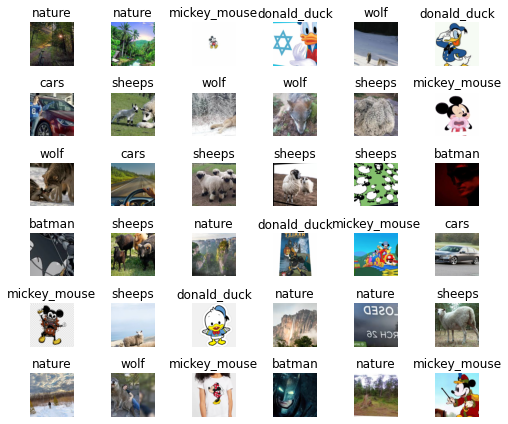

In [39]:
data.show_batch(rows=6, figsize=(7,6))

In [0]:
from PIL import Image # used for loading images
import numpy as np
import os # used for navigating to image path
import imageio # used for writing images
import matplotlib.pyplot as plt

In [0]:
def label_img(DIR):
  if DIR == '/content/images/batman' : return np.array([0])
  elif DIR == '/content/images/cars' : return np.array([1])
  elif DIR == '/content/images/donald_duck' : return np.array([2])
  elif DIR == '/content/images/mickey_mouse' : return np.array([3])
  elif DIR == '/content/images/nature' : return np.array([4])
  elif DIR == '/content/images/sheeps' : return np.array([5])
  elif DIR == '/content/images/wolf' : return np.array([6])

In [0]:
IMG_SIZE = 300
def load_training_data(DIR):
  train_data = []
  # train_data_output = []
  for img in os.listdir(DIR):
    label = label_img(DIR)
    path = os.path.join(DIR, img)
    img = Image.open(path)
    img = img.convert('L')
    img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
    train_data.append([np.array(img),label])
    # train_data_output.append([label])
  # shuffle(train_data)
  return train_data

In [0]:
train_data_batman = load_training_data("/content/images/batman")
train_data_car = load_training_data("/content/images/cars")
train_data_donald = load_training_data("/content/images/donald_duck")
train_data_mickey = load_training_data("/content/images/mickey_mouse")
train_data_nature = load_training_data("/content/images/nature")
train_data_sheep = load_training_data("/content/images/sheeps")
train_data_wolf = load_training_data("/content/images/wolf")

In [77]:
train_data_batman[0][-1]

array([0])

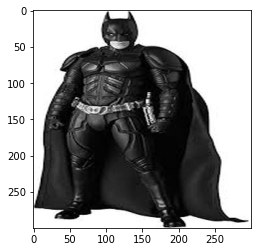

In [78]:
plt.imshow(train_data_batman[44][0], cmap = 'gist_gray')

In [0]:
train_data = train_data_batman + train_data_car + train_data_donald + train_data_mickey + train_data_nature + train_data_sheep +train_data_wolf

In [80]:
train_data.sample(frac=1)

<function list.sort>

In [0]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(7, activation = 'softmax'))

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [86]:
model.fit(trainImages, trainLabels, batch_size = 10, epochs = 5, verbose = 1)

Epoch 1/5
3113/3113 [==============================] - 467s 150ms/step - loss: 1.4371 - accuracy: 0.5268
Epoch 2/5
3113/3113 [==============================] - 472s 152ms/step - loss: 0.9350 - accuracy: 0.6704
Epoch 3/5
3113/3113 [==============================] - 473s 152ms/step - loss: 0.6591 - accuracy: 0.7687
Epoch 4/5
3113/3113 [==============================] - 474s 152ms/step - loss: 0.4904 - accuracy: 0.8204
Epoch 5/5
3113/3113 [==============================] - 473s 152ms/step - loss: 0.3762 - accuracy: 0.8625
